## 실습 4.1. Deep Neural Network

MNIST 데이터 셋: 손으로 쓴 숫자들로 이루어진 공개된 데이터베이스

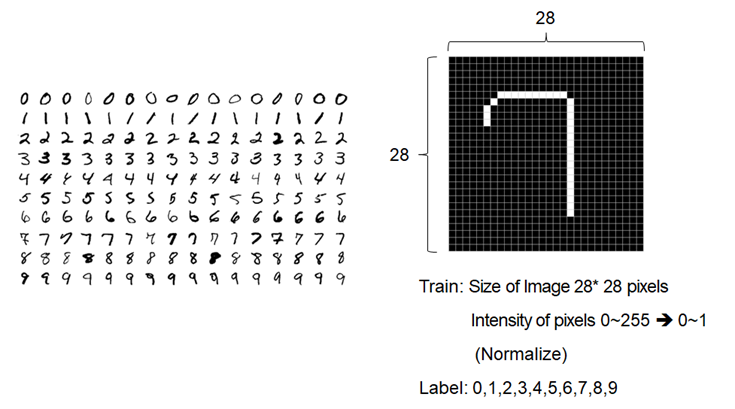


MNIST 문제는 손글씨 이미지 (intput)에 적혀 있는 숫자 (Output)을 분류하는 문제임.   
(Output이 숫자이긴 하지만, 연속적인 값이 아닌 이산적인 값이므로 "예측"이 아닌 "분류" 문제임.   
특히, Output이 0 ~ 9 까지의 총 10가지의 값을 가지므로 "다중분류"에 해당함.  

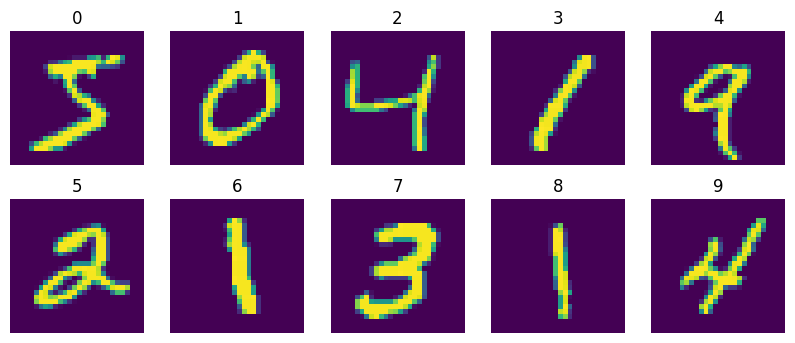

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#MNIST 데이터셋 불러오기 (Online에서 다운로드)  
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# mnist_train = np.loadtxt('mnist_train.csv',delimiter =',')
# y_train = mnist_train[:,0]
# X_train = np.reshape(mnist_train[:,1:],(60000,28,28))
# mnist_test = np.loadtxt('mnist_test.csv',delimiter =',')
# y_test = mnist_test[:,0]
# X_test = np.reshape(mnist_test[:,1:],(10000,28,28))

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

#one-hot encoding
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

# 시각화
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(i)
plt.show()


In [2]:
# 이전 세션 클리어
tf.keras.backend.clear_session()

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(units=10,
                                activation=tf.nn.softmax,
                                kernel_initializer='he_uniform'))
model.summary()
# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics= tf.keras.metrics.CategoricalAccuracy())

model.fit(x_train, y_train, epochs=10)

acc = tf.keras.metrics.CategoricalAccuracy()
acc.update_state(y_train, model(x_train))
print("Train Accuracy: {:.4f}".format(acc.result().numpy()))
acc.update_state(y_test, model(x_test))
print("Test Accuracy: {:.4f}".format(acc.result().numpy()))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400906 (1.53 MB)
Trainable params: 400906 

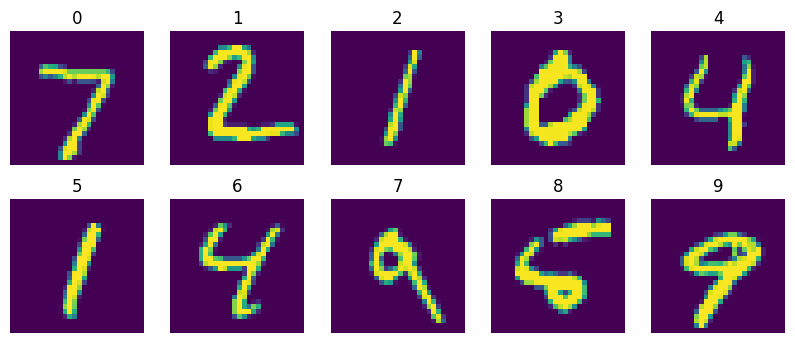

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32) [7 2 1 0 4 1 4 9 5 9]
1/1 [==============================] - 0s 72ms/step
[[2.22321568e-14 1.22883137e-09 6.22974949e-06 1.81417442e-06
  1.20478333e-07 7.82702259e-09 2.41711096e-10 9.99837995e-01
  4.88480312e-10 1.53900211e-04]
 [0.00000000e+00 9.90571779e-18 1.00000000e+00 2.08636559e-12
  1.58004711e-15 2.05298108e-35 4.35806679e-34 8.69862973e-16
  3.68365983e-20 2.31549557e-35]
 [3.83074895e-22 9.99981403e-01 3.24949911e-09 1.00205934e-10
  2.39980119e-11 6.66954200e-11 9.17497300e-10 2.52634780e-09
  1.86503239e-05 6.58143028e-13]
 [9.16048229e-01 3.11703421e-03 6.13834336e-03 8.02089926e-03
  7.74173066e-03 1.

In [3]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(i)
plt.show()

print(y_test[0:10], np.argmax(y_test[0:10], axis=1))

y_pred = model.predict(x_test[0:10,:,:])
print(y_pred[0:10], np.argmax(y_pred, axis=1))


In [31]:
# 설정 및 학습 코드는 앞 쪽의 MNIST 예제 코드 사용
tf.keras.backend.clear_session()

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(tf.keras.layers.Dense(units=256, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=256, use_bias = False, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=256,kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation(tf.keras.activations.sigmoid))

model.summary()
# 옵티마이저 정의
optimizer = tf.keras.optimizers.Adam(0.1)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics= tf.keras.metrics.CategoricalAccuracy())
model.fit(x_train,y_train,epochs = 10)

m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_train, model.predict(x_train))
print("Train accuracy: {:5.4f}".format(m.result().numpy()))
m.update_state(y_test, model.predict(x_test))
print("Test accuracy: {:5.4f}".format(m.result().numpy()))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65536     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

### 실습. DNN model for MNIST

Train data의 Accuracy가 98% 이상, Test data의 Accuracy가 97% 이상이 되는 인자들의 값을 찾으시오.


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 1)                 0         
                                                                 
 dense_37 (Dense)            (None, 256)               512       
                                                                 
 batch_normalization_32 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               65536     
                                                                 
 batch_normalization_33 (Ba  (None, 256)               1024      
 tchNormalization)                                    

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'result'